# Baseball Case Study


Problem Statement:


This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 




-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors




-- Output: Number of predicted wins (W)




To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics




For downloading the dataset, use the link given below. 

In [1]:
#Lets import necessary Libraries
import pandas as pd
import numpy as np

#Lets import Visualization Tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
#Lets load the dataset
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
#Lets check the shape of the dataset
data.shape

(30, 17)

So ,We have 30 Rows and 17 Columns

In [8]:
#Lets check the is null of the dataset
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

So, We dont have any Null Values we are good to proceed .

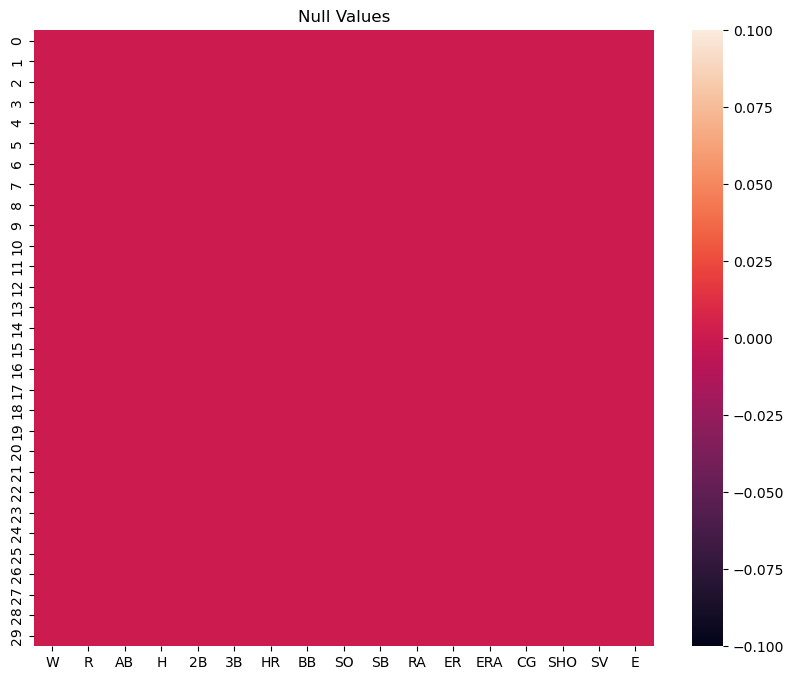

In [9]:
#Lets plot heatmap and check null values
plt.figure(figsize=[10,8])
sns.heatmap(data.isnull())
plt.title('Null Values')
plt.show()

So , Here we can clearly see that there are no null values.

In [10]:
#Lets check the datatypes of the each Feature and target
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

So , Here we have 16 Integer Columns and 1 Float Column. 



In [11]:
#Lets check for duplicates
data.duplicated().sum()

0

So, Here we dont have any duplicates  value.

In [12]:
#Lets check the Basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


So , Here we plot the basic information of the dataset . and we can observe here we have to 17 columns  and in 17 columns we have 16 integer  data type columns and 1 are float column. and we use 4.1 KB Memory

# Lets Do EDA - Eploratory Data Anylysis

# Now, let’s visualize the distribution of continuous features

In [13]:
def plots(data,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=data,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=data)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=data)
    plt.show

Here we create one function for making 3 graph in code as many times we want .


    1 Plot is Hist Plot
    
    2nd Plot is Regplot for checking relationship with Target.
    
    3rd Plot is Boxplot for checking Outliers.
 

# Lets plot R (Run) 

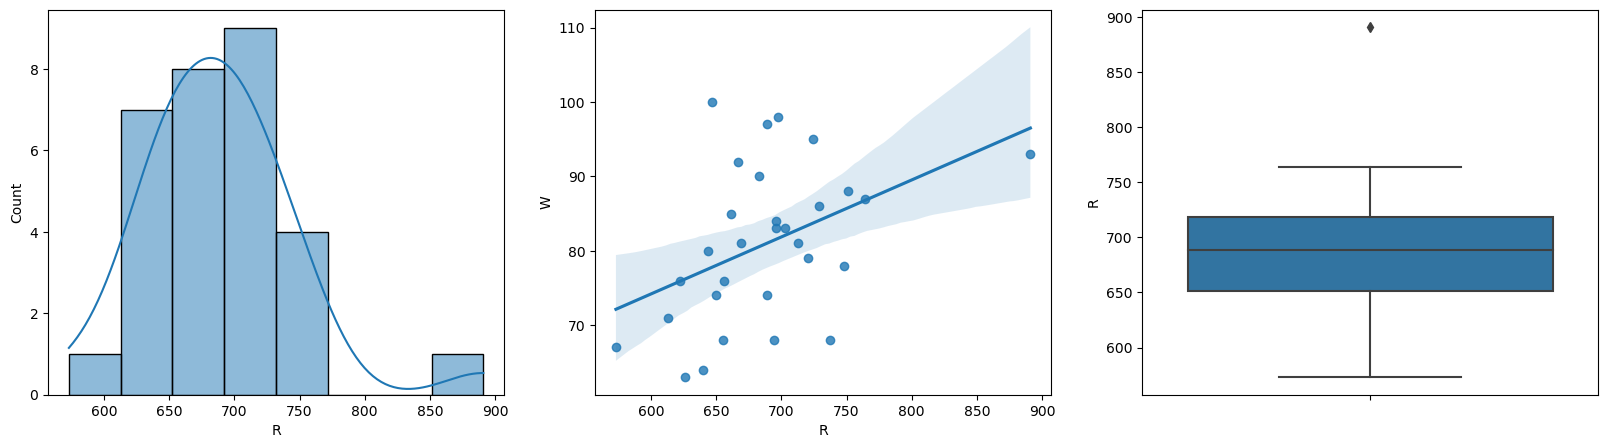

In [14]:
plots(data,"R")

# Observation

1 - Hist plot -> Dsitribution of the R is Right Skewed



2 - Reg Plot ->  Run and Win Linearly Correlated .


3 - Box Plot -> We can see that one outliers present in Run. 

# Lets Plot AB (At Bat)

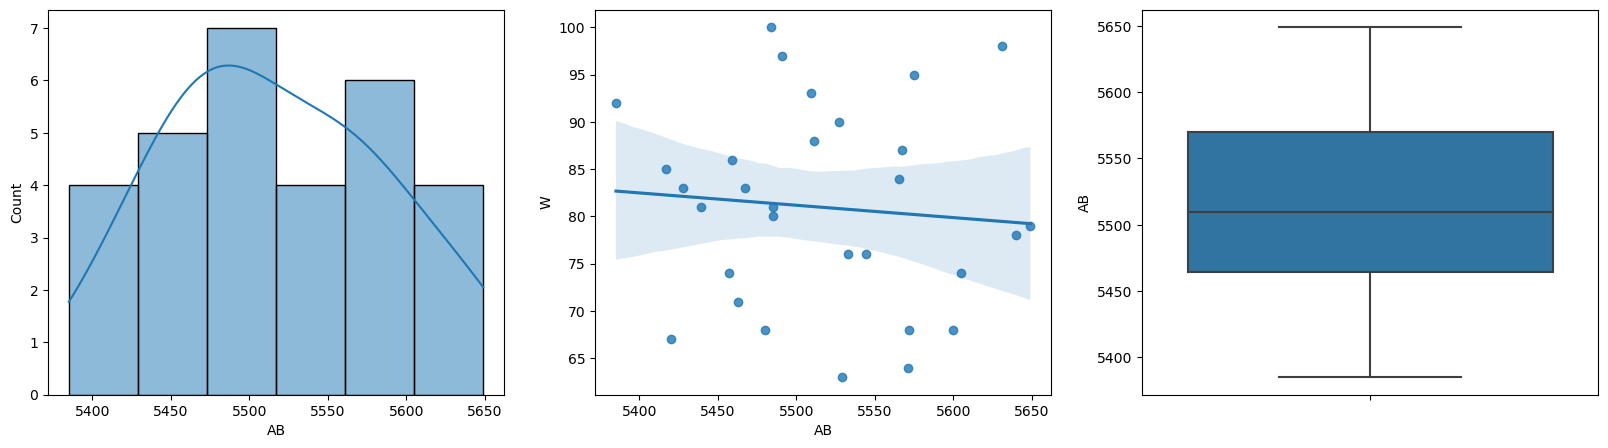

In [19]:
plots(data,"AB")

# Observations

1 - Hist Plot -> Dsitribution of the AB is Little Right Skewed



2 - Reg Plot -> At Ball is very less relationship with Win.


3 - Box Plot -> There is no outliers.


# Lets Plot H (Hits) 

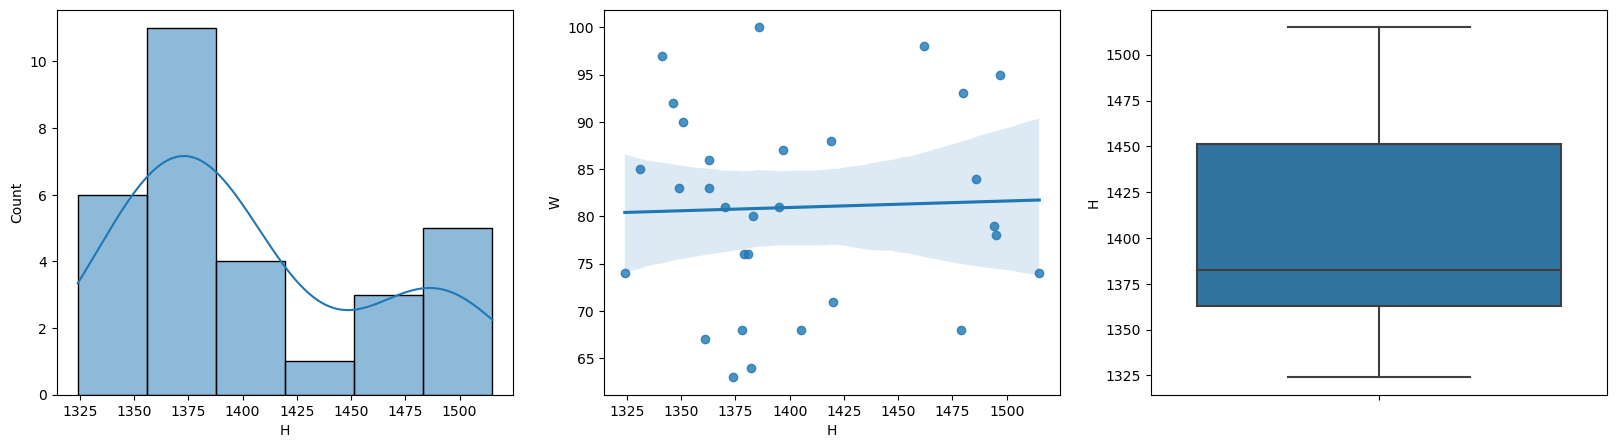

In [20]:
plots(data,"H")

# Observations

1 - Hist ->  Distribution of the H is Right Skewed

2 - Regplot -> Hits are also have very less relationship with Win.

3 - Boxplot -> Hits dont have any outliers.

# Lets Plot 2B (Double)

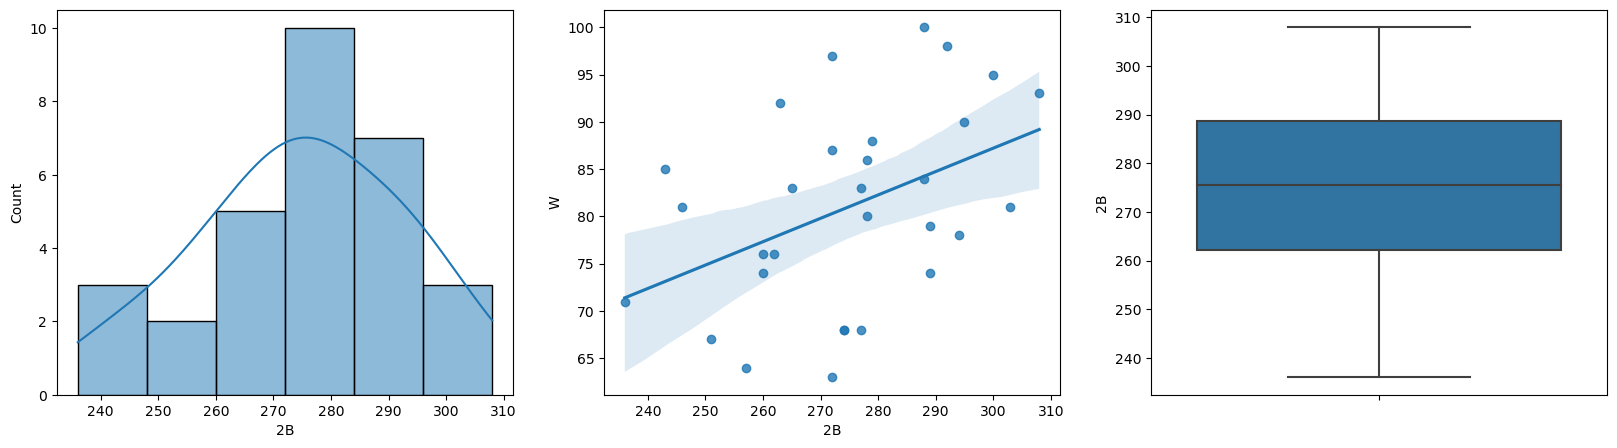

In [15]:
plots(data,'2B')

1 - Hist -> Dsitribution of the 2B is little Left Skewed


2 - Regplot -> "2B" have linearly related with Wins.

2 - Boxplot -> "2B" have not outliers .

# Lets Plot 3B (Triple)

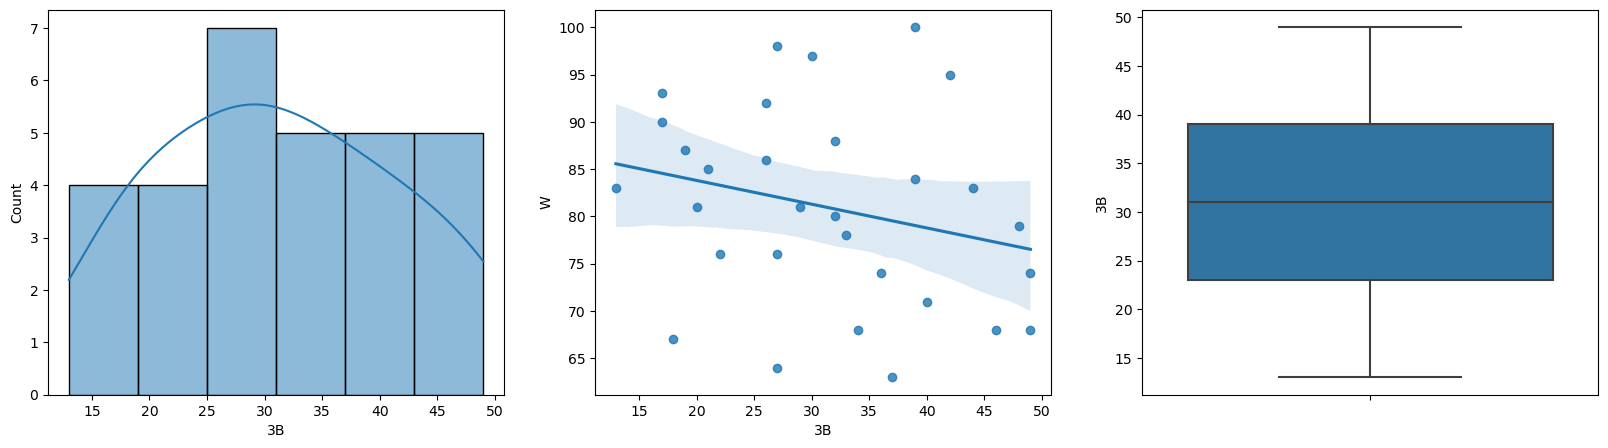

In [16]:
plots(data,"3B")

# Observations

1 - Hist -> 

2 - Regplot -> 3B have less negative correlationship with Win.

3 - BoxPlot -> 3B have no Outliers.

# Lets plot HR (Home Runs)

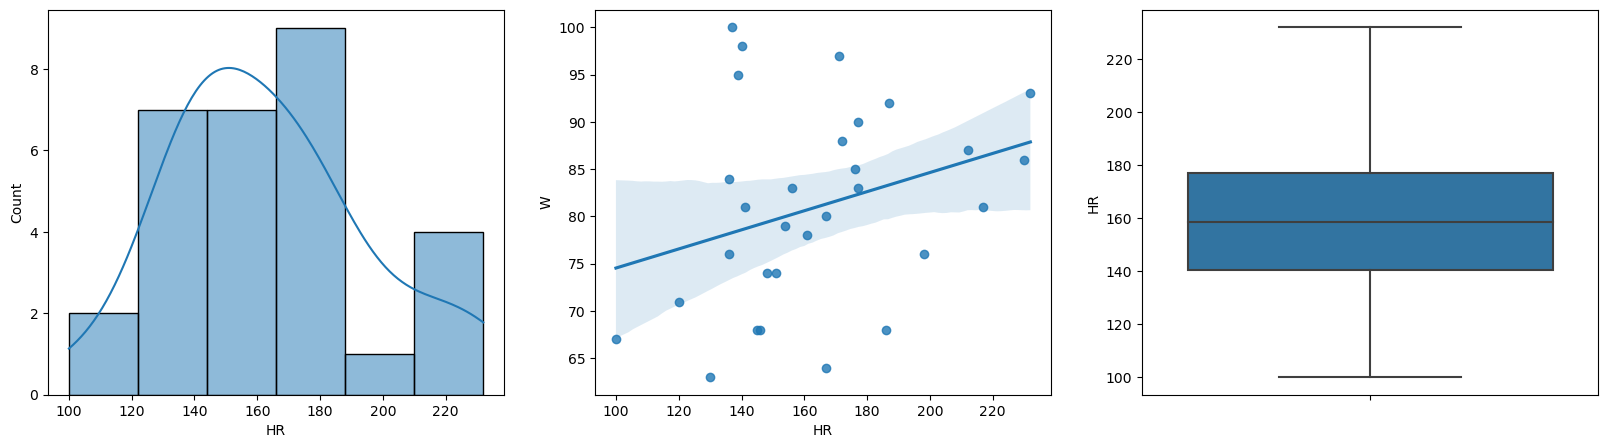

In [17]:
plots(data,"HR")

# Observations

1 - Hist -> The data is little right skewed.

2 - Regplot -> HR have linearly correlation with Win.

3 - BoxPlot -> HR have no Outliers.

# Lets plot BB (Walks) 

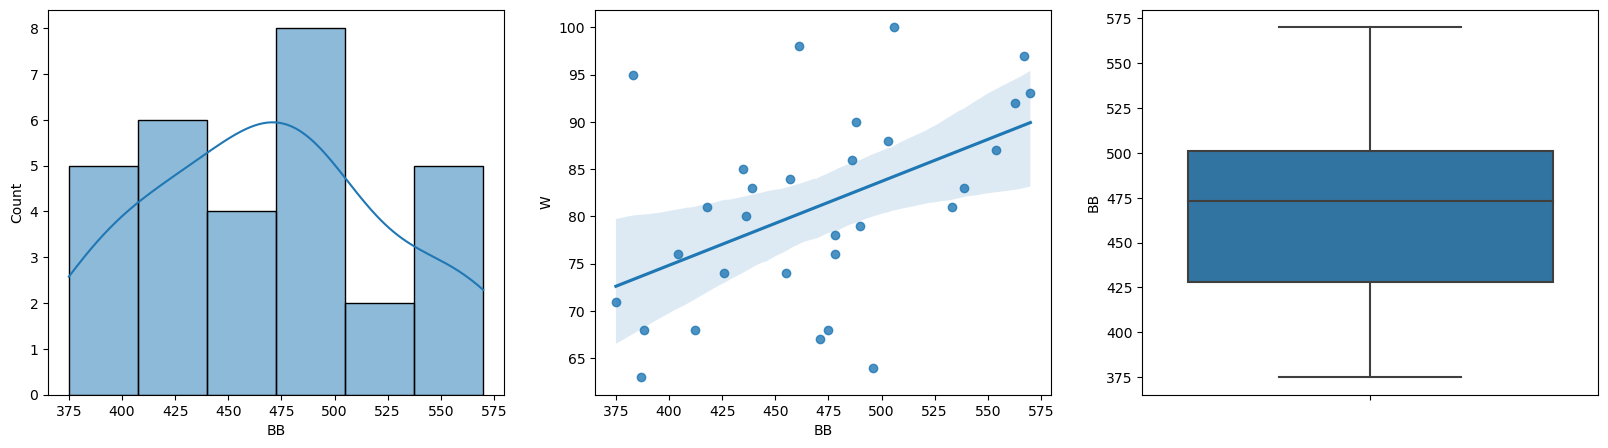

In [18]:
plots(data,"BB")

# Observations

1 - Hist -> Dsitribution of the BB is Normal


2 - Regplot -> BB have lightly correlation with win.


3- BoxPlot -> BB have no outliers.



# Lets Plot SO(Strikeouts)

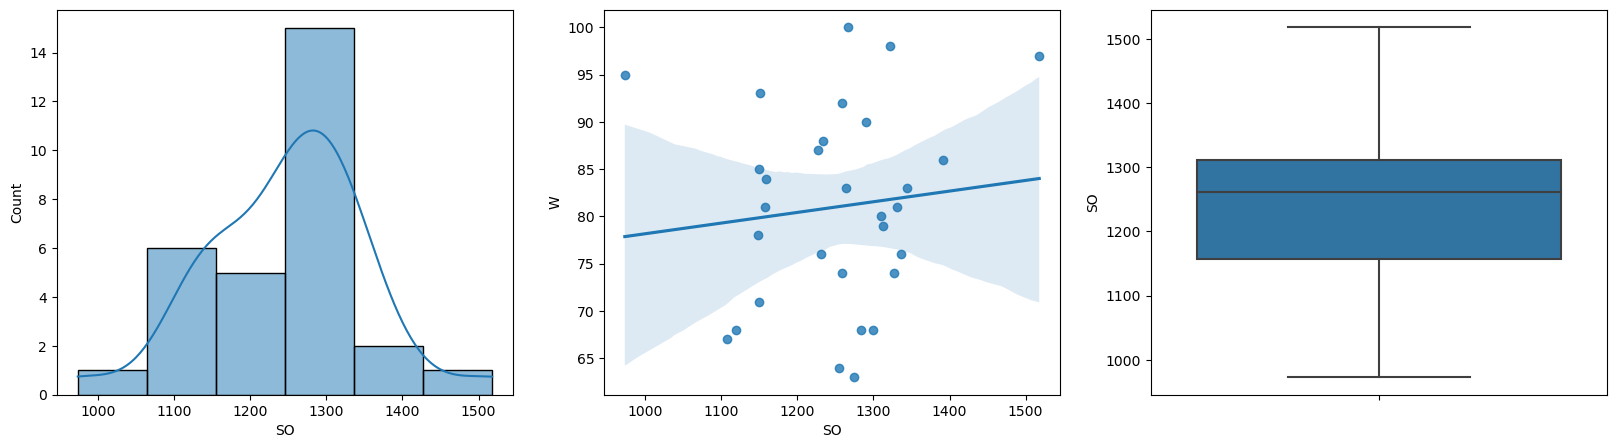

In [19]:
plots(data,'SO')

# Observations

1 - HistPlot -> Dsitribution of the SO is Normal


2 - Regplot -> SO have not linearly correlation with Win.

3 - Boxplot -> SO have not Outliers.

# Lets plot SB (Stolen Bases)

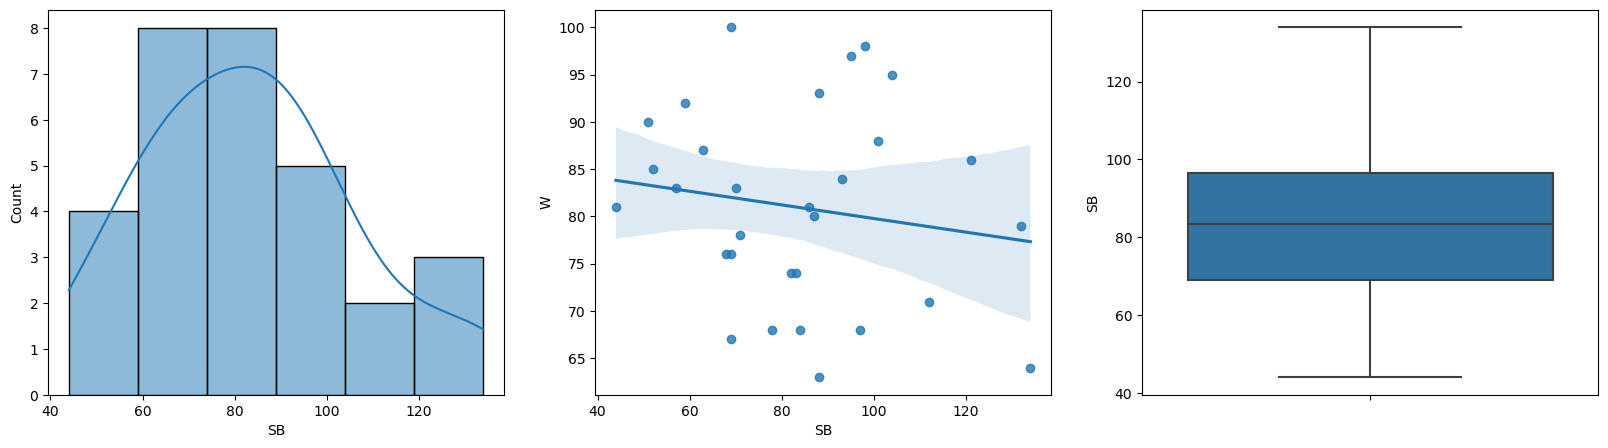

In [20]:
plots(data,'SB')

# Observation

1 - Histplot ->Dsitribution of the SB is Right Skewed


2 - Regplot -> SB have no linearly correlation with Win.

3 - Boxplot -> SB have no Outliers. 

# Lets plot RA (Runs Allowed)

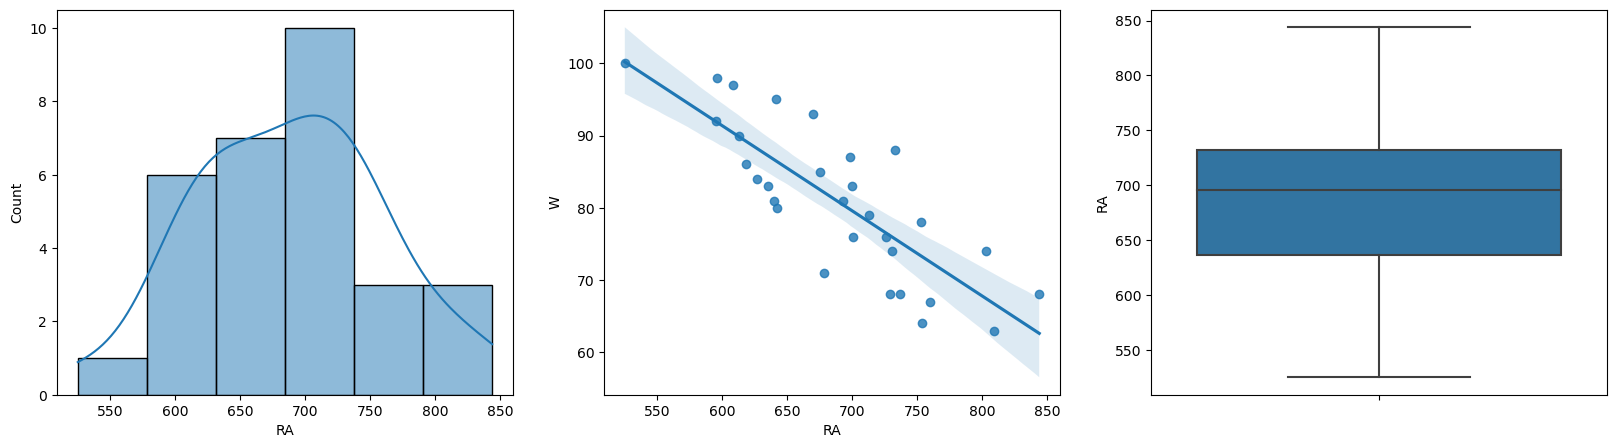

In [21]:
plots(data,'RA')

# Observations


1 - Histplot -> Dsitribution of the RA is Normal


2 - Regplot -> RA have highly negatively correlated with Win.

3 - Boxplot -> RA have no Outliers.

# Lets Plot ER (Earned Runs)

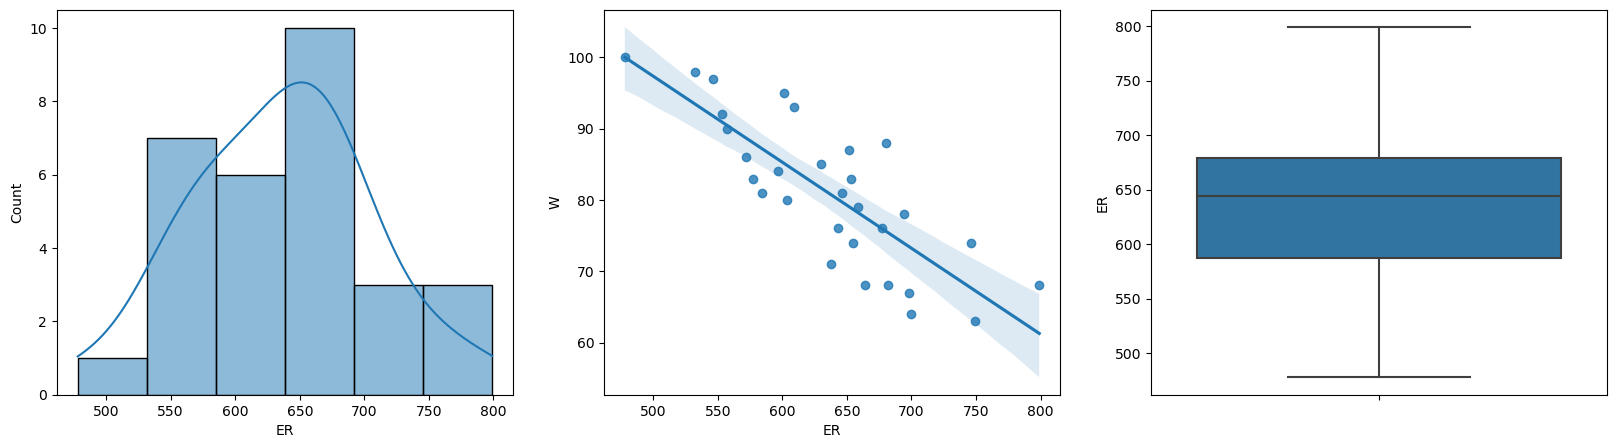

In [22]:
plots(data,'ER')

# Observations

1 - Histplot -> Dsitribution of the ER is Normal


2 - Regplot ->  Earned Runs have highly negatively correlation with Win.

3- Boxplot ->  Earned Runs have no Outliers.

# Lets plot ERA (Earned Run Average)

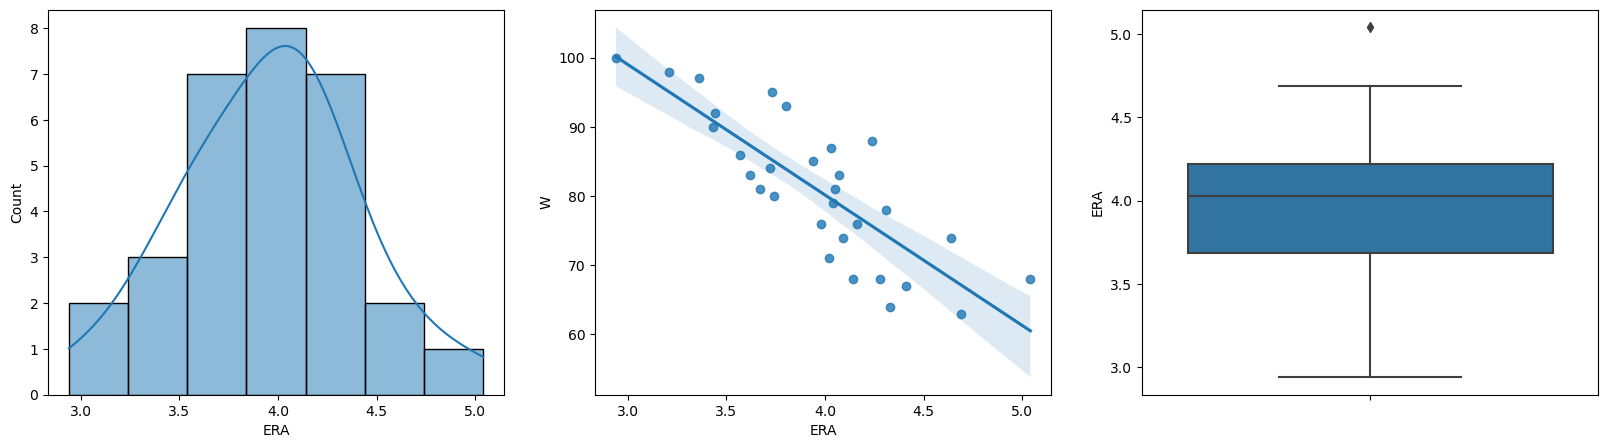

In [23]:
plots(data,'ERA')

# Observations

1- HistPlot ->  Dsitribution of the ERA is Normal

2- Regplot  -> ERA have negatively highly linearly correlation with Win.


3- Boxplot -> ERA dont have outliers .

# Lets plot  CG (Complete Game)

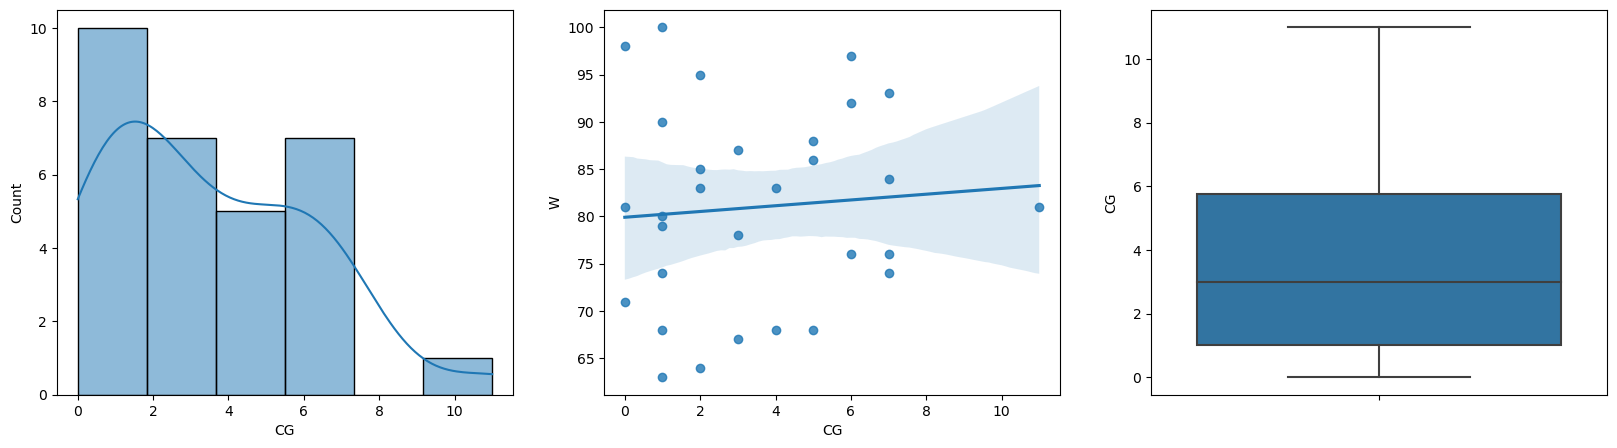

In [24]:
plots(data,"CG")

# Observations

1- HistPLot -> Distribution of CG is right skewed.

2- Regplot ->  CG have not any linearly correlation with Win.

3- Boxplot -> CG have no outliers .

# Lets plot SHO(Shutout)

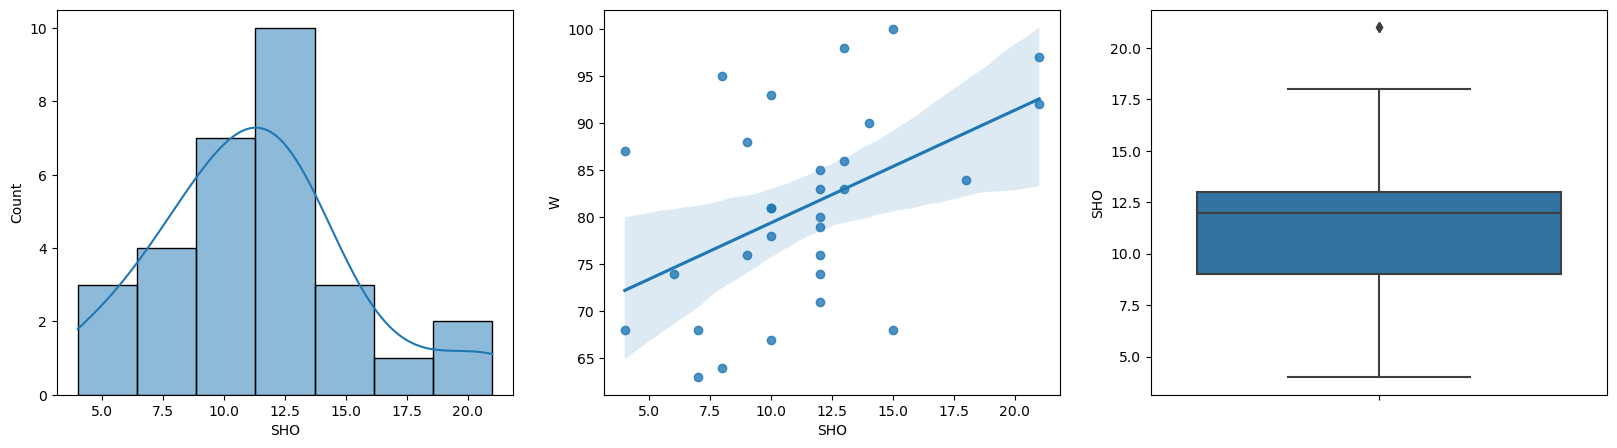

In [25]:
plots(data,'SHO')

# Observation

1 - Histplot -> Distribution of SHO is little Right Skewed

2 - Regplot  ->   Shutout have highly correlation with Win.


3 -  Boxplot ->  Shutout have no outliers

# Lets Plot SV(Save)

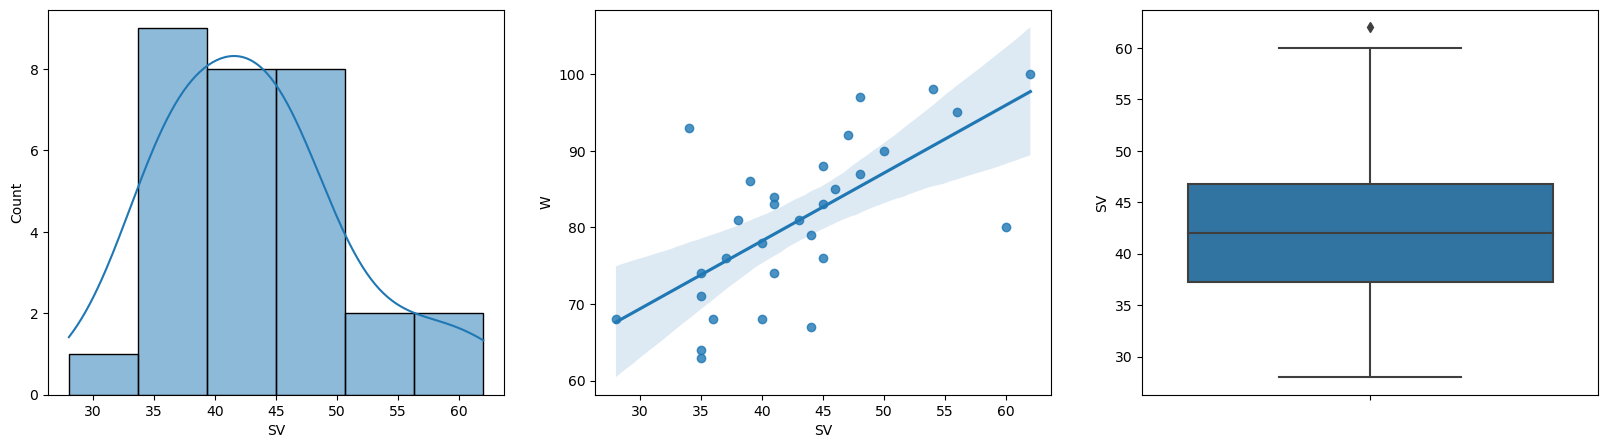

In [26]:
plots(data,'SV')

# Observations

1- Histplot -> Distribution of SV is little bit right skewed.

2- RegPlot -> SV have lightly correlation with Win.

3- Boxplot -> SV have outliers But we dont consider as a outliers because they dont big difference . they follow some order .

# Lets plot E (Errors)

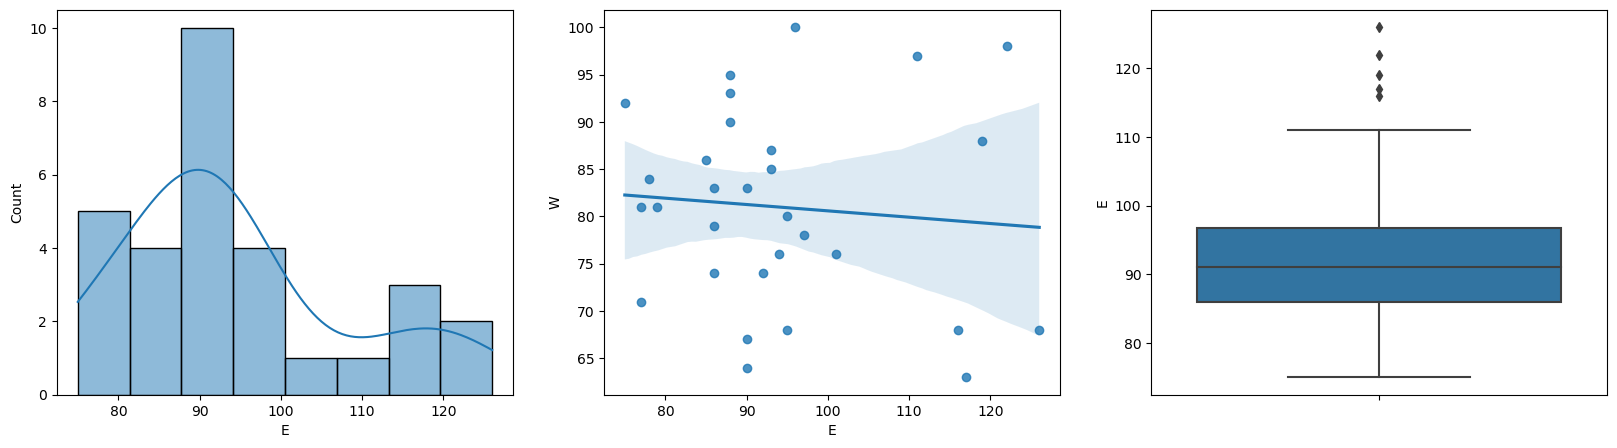

In [27]:
plots(data,"E")

# Observations 

1- Histplot -> Distribution of the Errors is Right Skewed.

2- Regplot -> Erros have not any correlation with Win.

3 - Boxplot -> Erros have some outliers . (We have to tream them)

#  Story of the Dataset .

So , In our dataset . We have 30 Rows and 17 Columns . and they dont have any null values .



# Lets Know What Visualization Tell Story..


    Highly Positive Relationship With Label - > Run , Double , Home Run , Walks , Shout Out and Save .
    
    
    Negatively Relationship With Label - > Earned Run Average , Earned Runs , Runs Allowed , Stolen Base and Triple.
    
    
    
Left Feature have no linear Correlation With our Target (Win)




# Describe The Dataset

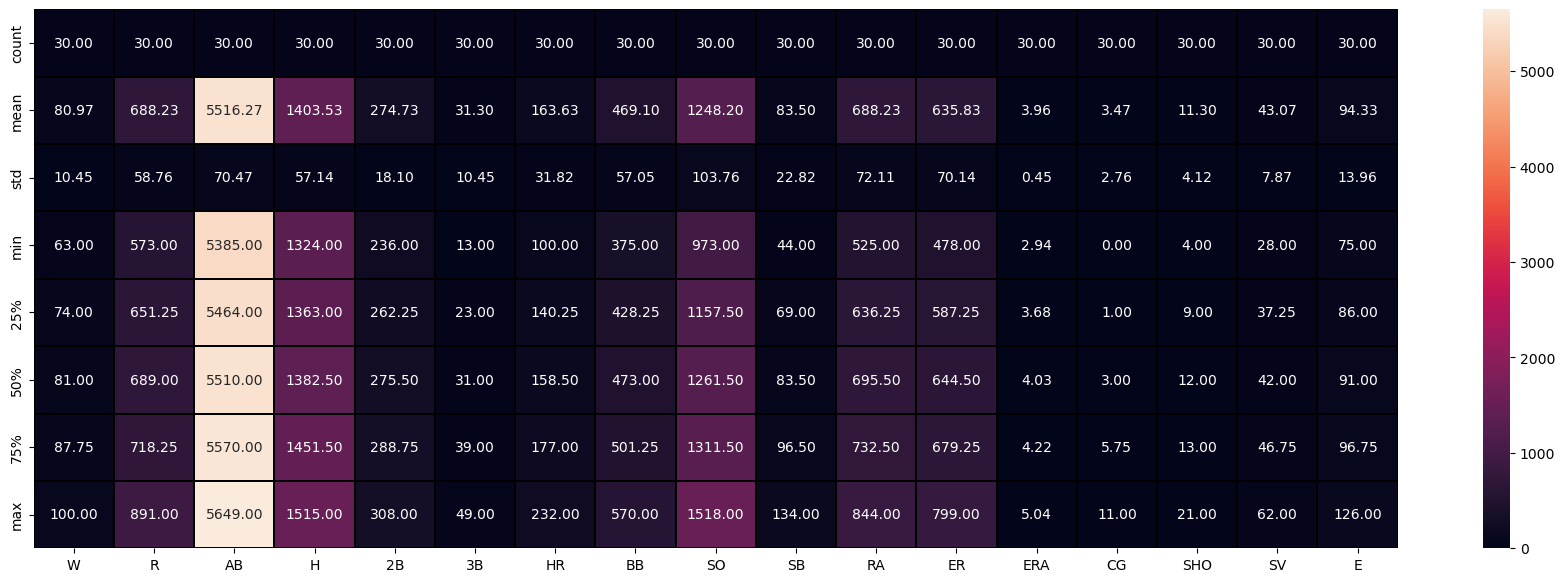

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")
plt.show()

# Observations


- There are no Null Values .

- Outliers in Errors Column.


# Check the Skewness.

In [29]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Here we set threshold for skewness is -/+ 0.5 .


Feature Which Comes in Our Threshold Range -> AB , 3B , BB , SB.


Fetaure Which Dont Come in Our Threshold Range -> R , H ,2B,3B , HR, SO, RA, ER, ERA, SHO, SV, E.


and we also seen the Hist plot some of the columns have skewness . So we have to treat them..by using Power Tranformer.



# Correlation of the columns with target columns.

In [30]:
data.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

# Observations


Columns With Good Correlation with Target Columns ->ERA, RA, ER, SV.


Columns With Less Correlation with Target Columns -> 3B, HR, 2B, R, SHO, BB.


Columns With No Correlation With Target Columsn -> SB, E, AB, H, CG, SO

# Checking the column which are positively and negative correlated with the target columns

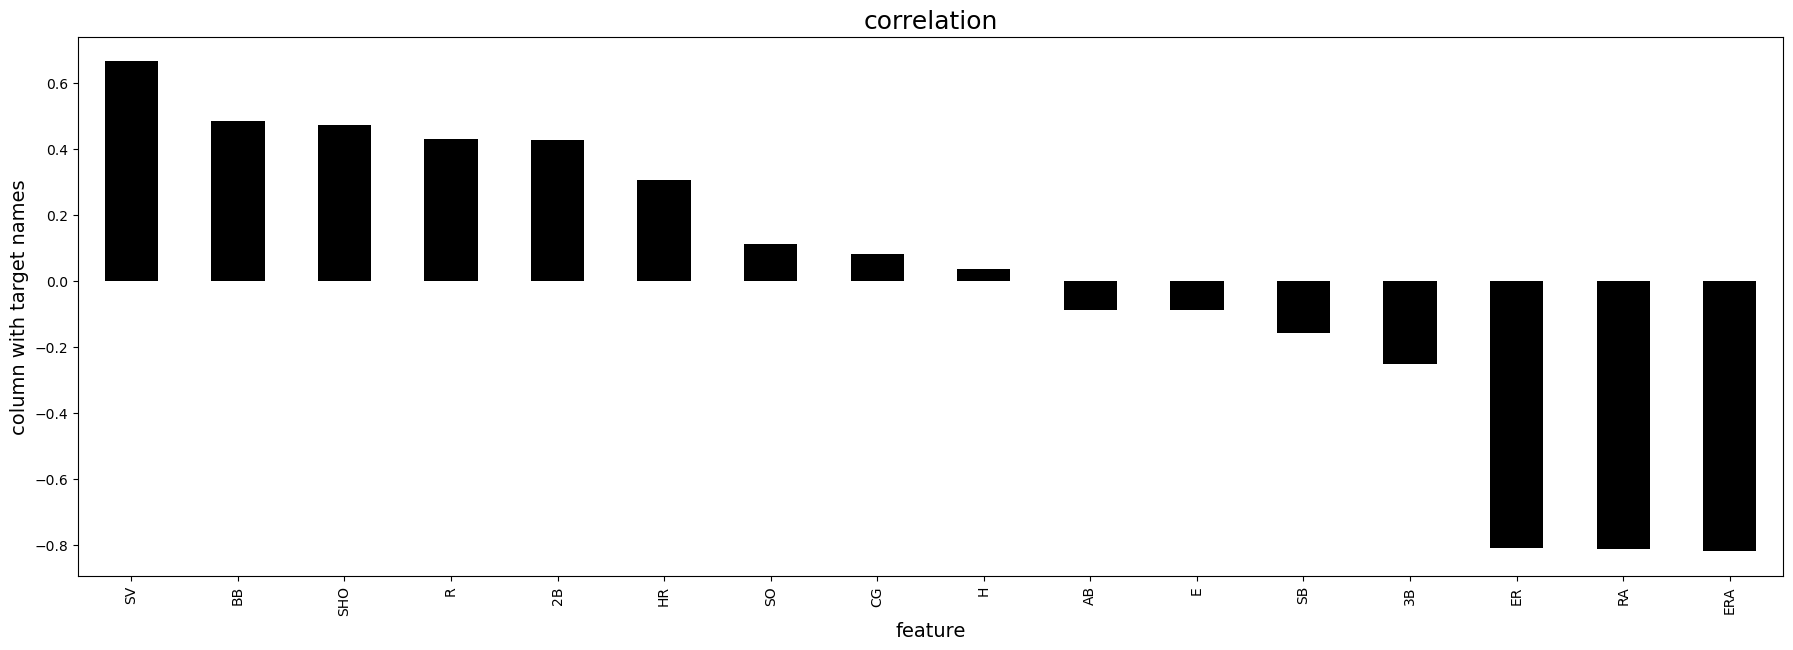

In [31]:
plt.figure(figsize=(22,7))
data.corr()['W'].sort_values(ascending=False).drop('W').plot(kind='bar',color='BLACK')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Observations.

Columns With Positive Relationship -> SV, BB, SHO, R, 2B, HR, SO, CG, H.


Columns With Negative Relationship -> AB, E, SB, 3B, ER, RA, ERA.

# Lets Check Correlation of all Data .

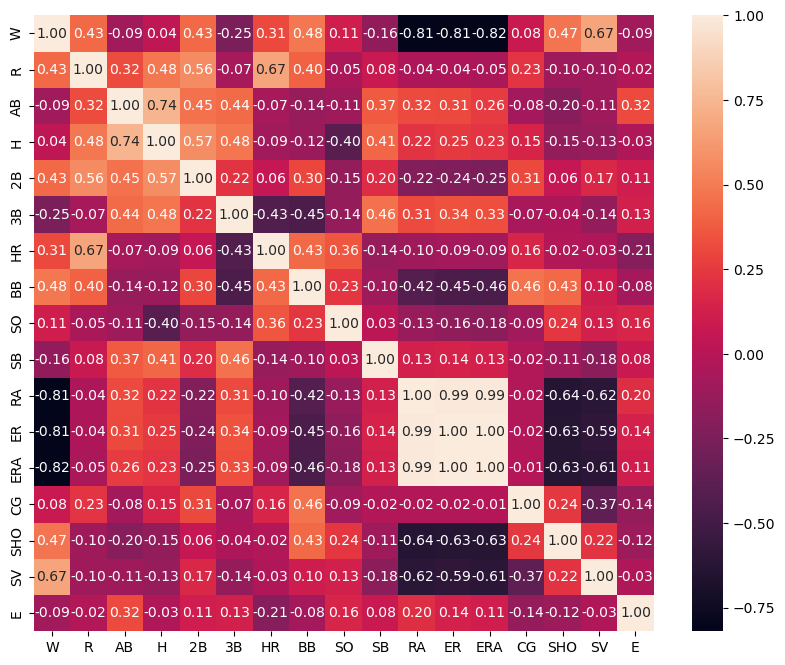

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',)
plt.show()

#  Observations

- H and AB -> Have 74% Relationhip May be it created Multicollinearity Problem.



and Left columns have relationship with each other but not like H and AB . So , Which are are not create Multicollinearity Problem . We will Fix them .

# Lets Check For Outliers  .

We already seen We have outliers in Erros . Lets Plot again and check again.

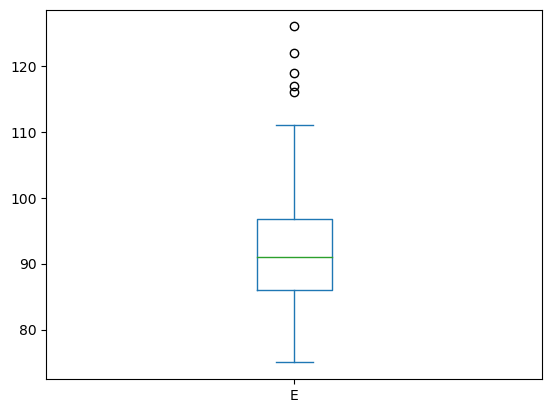

In [33]:
data['E'].plot.box()
plt.show()

So ,Here we Confirming , We have some Outliers in Error Columns . and We have to treat them .Z sc

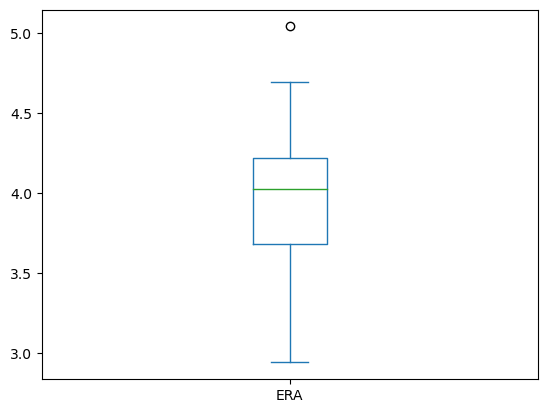

In [34]:
data['ERA'].plot.box()
plt.show()

Here we can see that , There are some outliers. Between 4.5 to 5.0

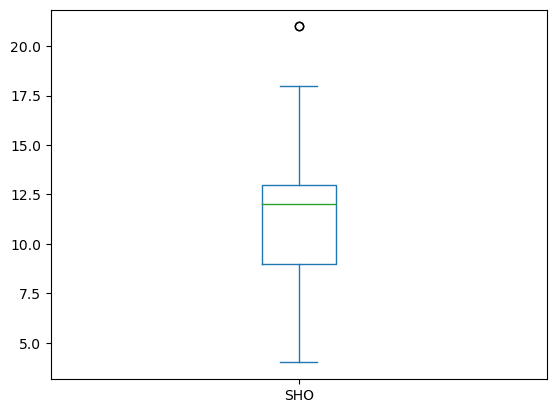

In [35]:
data['SHO'].plot.box()
plt.show()

Here we can see that , There are some outliers. Between 19 to 22

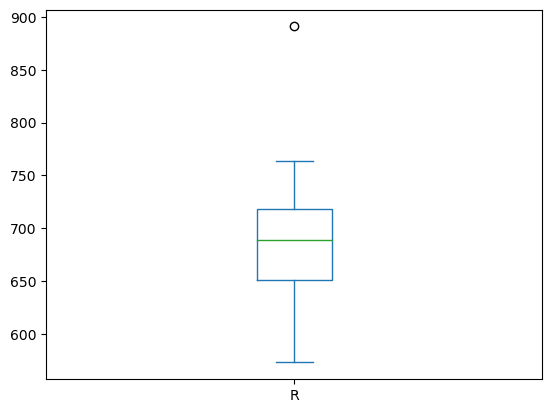

In [36]:
data['R'].plot.box()
plt.show()

Here we can see that , There are some outliers. Between 850 to 900

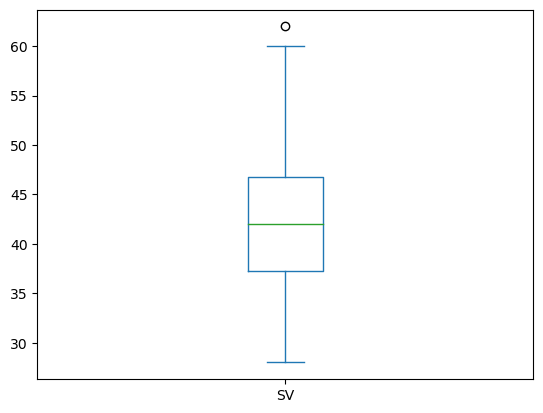

In [37]:
data['SV'].plot.box()
plt.show()

Here we can see that , There are some outliers. Above 60

# Lets Remove Outliers.

In [38]:
#Features having outliers
features=data[['R','ERA','SHO','SV','E']]

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=data[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [40]:
#Checking shape of new dataset
df_new.shape

(29, 17)

There are 29 rows and 17 columns of shape of new dataset after removing outliers.

In [41]:
#Checking shape of old dataset
data.shape

(30, 17)

In [42]:
#Checking dataloss
Dataloss = (((30-29)/30)*100)
Dataloss

3.3333333333333335

So , here we remove 3% of the dataset .

# Removing Skewness:

In [43]:
#list of skewed features
skew_features=["R" , "H" ,"2B","3B" , "HR", "SO", "RA", "ER", "ERA", "SHO", "SV", "E"]

In [44]:
#Removing skewness in H using log1p
df_new["H"]=np.log1p(df_new["H"])

In [45]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [46]:
#Removing skewness using yeo-johnson
df_new[["R" ,"2B","3B" , "HR", "SO", "RA", "ER", "ERA", "SHO", "SV", "E"]] = scaler.fit_transform(df_new[["R" ,"2B","3B" , "HR", "SO", "RA", "ER", "ERA", "SHO", "SV", "E"]].values)

In [47]:
#Checking skewness after removing skewness
df_new.skew()

W      0.119013
R     -0.024842
AB     0.169573
H      0.738455
2B    -0.052793
3B    -0.075139
HR     0.000448
BB     0.151193
SO     0.051530
SB     0.494966
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG     0.854980
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

After trying to remove skewness in H using yeo-johnson method i got 0.0 skewness. and also removed the skewness of skewed columns

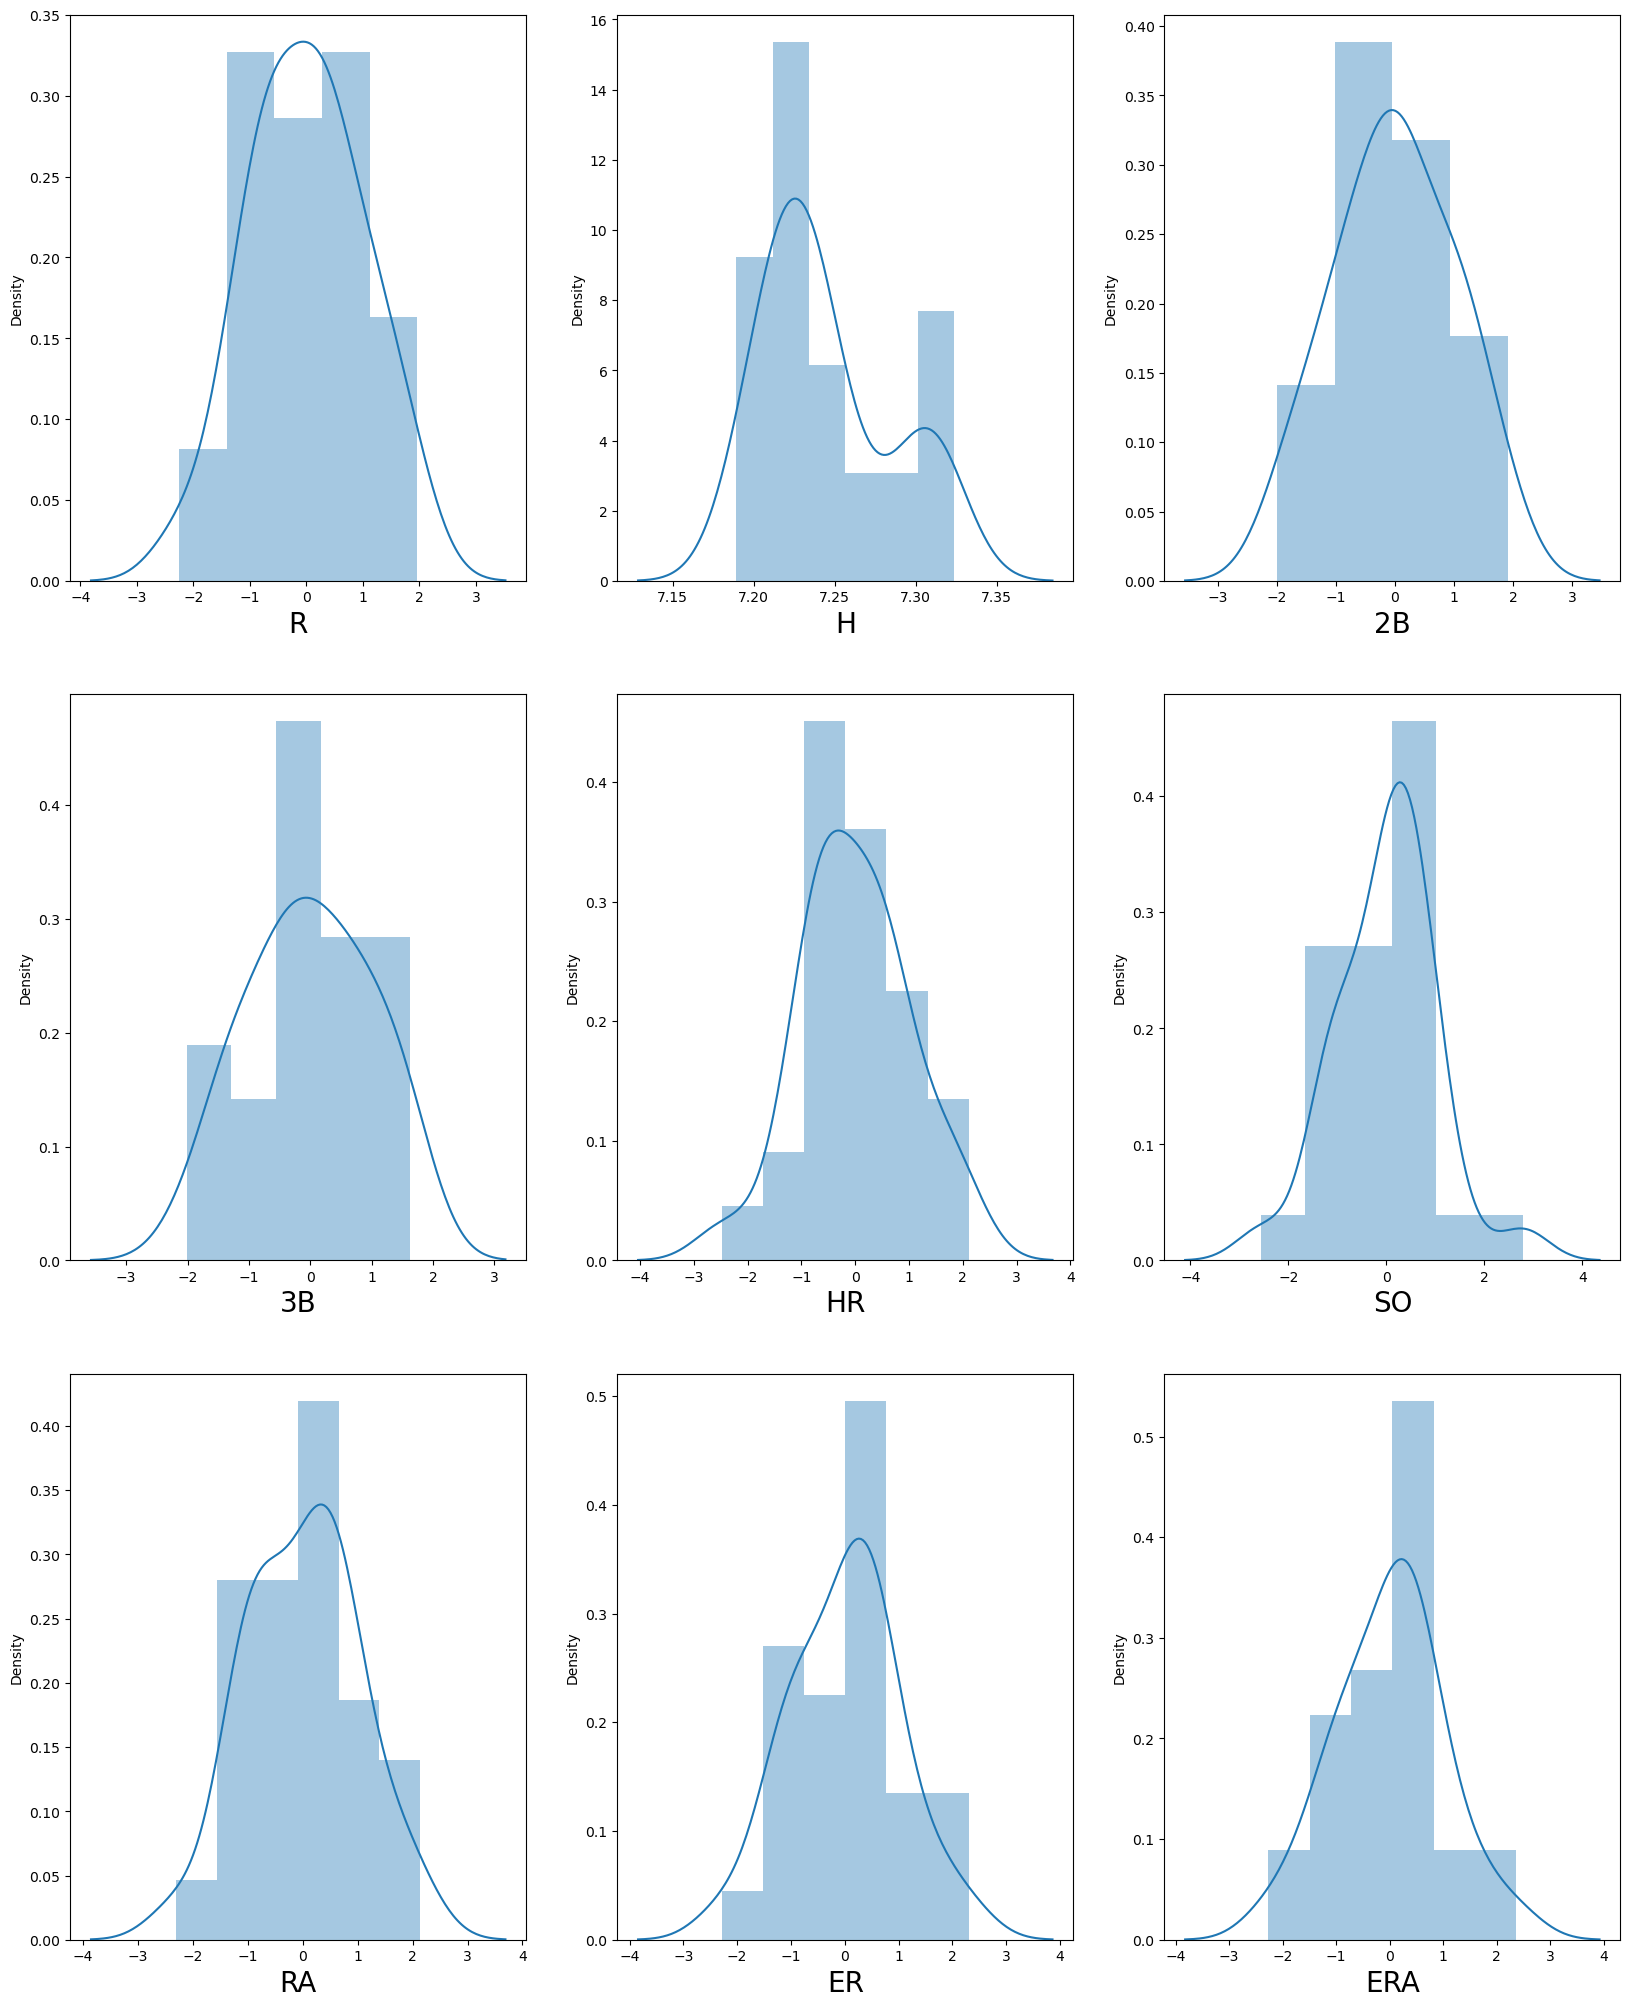

In [48]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skew_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

and After seeing this plot we also confirmed we we removed the skewness of our data .

In [49]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Lets Separate the Feature and Label

In [50]:
x = df_new.drop("W",axis=1)
y = df_new["W"]

# Lets Scale the Data Using Standard Scaler

In [51]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaler

array([[ 9.62543504e-01,  8.30084222e-01,  1.72372599e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.53635899e+00, -2.55061247e+00,  9.05952902e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -5.01485887e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01, -7.02830744e-01, -9.49845892e-01,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.95020511e-01,  9.36832915e-02, -5.85315147e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -5.01485887e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01, -1.10025314e+00, -8.87001319e-02,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.25294051e+00, -9.35611465e-01,  1.16458052e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.85461197e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  2.33950624e

# Variance inflation factor:

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,4.296560,R
1,134303.137364,AB
2,136742.542119,H
3,3.504147,2B
4,2.889112,3B
5,5.996385,HR
6,219.843996,BB
7,2.894526,SO
8,29.638816,SB
9,198.031634,RA


VIF values i can say that multicolinearity exists in AB,H,BB,RA,ER. So let me drop AB,H,RA,BB and ER columns to avoid multicolinearity.

In [53]:
#Droping ER
x = x.drop(["AB","H","RA","BB","ER"],axis=1)

In [54]:
#Lets check the dataset
x.head()

,R,2B,3B,HR,SO,SB,ERA,CG,SHO,SV,E
0,0.962544,1.685188,1.006150,-0.741927,-2.550612,104,-0.509292,2,-0.787002,1.532753,-0.348265
1,0.298863,0.138198,1.185227,-0.109958,0.093683,70,0.241440,2,0.236737,0.312020,-0.540820
2,-0.312105,1.907385,-0.228819,-0.664354,-0.935611,86,-0.642098,11,-0.252844,-0.664137,-1.326125
3,-1.308298,-0.837665,-0.432228,-0.860039,-0.230683,68,0.043013,7,-0.513555,-0.820689,0.650818
4,0.137737,0.911435,1.622636,-0.289647,0.044143,83,1.493491,7,0.236737,-1.149165,-0.540820


# Splitting the data for training and testing:

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Let find the best random state

In [56]:
from sklearn.linear_model import  LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.972579197136913
At random state0, The test accuracy is :-0.404462657609826


At random state1, The training accuracy is :-0.9400448180356289
At random state1, The test accuracy is :-0.9206137051804363


At random state2, The training accuracy is :-0.9325213913020798
At random state2, The test accuracy is :-0.3540032452244334


At random state3, The training accuracy is :-0.958200439956251
At random state3, The test accuracy is :-0.7274227741601056


At random state4, The training accuracy is :-0.9519194979012695
At random state4, The test accuracy is :-0.825984486220721


At random state5, The training accuracy is :-0.9560139220925834
At random state5, The test accuracy is :-0.5841652265682928


At random state6, The training accuracy is :-0.9613834190686719
At random state6, The test accuracy is :-0.776831732965224


At random state7, The training accuracy is :-0.9493685001597343
At random state7, The test accuracy is :-0.787840606614672


Here i am selecting Random State - 15

In [57]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=15)

# Model Building:

# 1)Linear Regression:

In [58]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)
LR_Train=LR.predict(x_train)

0.9280127413980004


In [59]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 7.813944732213918
MAE: 1.9820069209563371
r2_score: 0.9336955657067452


Here i am getting R2_Score - 93%

# Lets Check the Our Model Is Overfitted or Not 

# 2)Lasso Regressor:

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [61]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100)),"max_iter":range(100)}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 1, 'max_iter': 3, 'random_state': 0}


In [62]:
ls=Lasso(alpha=1,random_state=0,max_iter=4)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',mean_squared_error(y_test,pred))
print('mae:',mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.8637808850359014
mse: 19.204115227999846
mae: 3.8720379696592135
rmse: 4.382250018882976


So, Here we gont R2_Score - 86 %

# 3)Ridge Regressor:

In [63]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],"random_state":list(range(0,100))}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 1, 'random_state': 18, 'solver': 'saga'}


In [64]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',mean_squared_error(y_test,pred))
print('mae:',mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.7022575596577615
mse: 41.975607711922116
mae: 5.357398220622678
rmse: 6.47885851920862


Here we got R2_Score->71%

# Cross Validation:

In [65]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [66]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 21.801653, 16.746076
R   : 19.459847, 15.014769
svr   : 21.474158, 14.844297
svr_p   : 112.926722, 78.946900
svr_r   : 111.349741, 81.455981
RF   : 38.025600, 23.046352
DTR   : 49.316667, 36.786203
GBR   : 46.197702, 29.299145


# Hyper Parameter Tuning:

In [67]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [109]:
parameter = {'alpha':[0.01,0.1,1.0,10.26],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool']}

In [110]:

GVC=GridSearchCV(Lasso(),parameter,cv=5)

In [111]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [108]:
GVC.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 10,
 'selection': 'random',
 'tol': 100}

In [121]:
lasso=Lasso(alpha= 1.0,fit_intercept= 'bool', max_iter= 10,selection= 'random',tol= 100)
lasso.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test,pred)))

R2_Score: 94.45739299538967
mean_squared_error: 7.813944732213918
mean_absolute_error: 1.9820069209563371
RMSE value: 2.7953434014828873


In [128]:
x_pro=lasso.score(x_test,y_test)
x_pro

0.8834097614404995

ValueError: x and y must be the same size

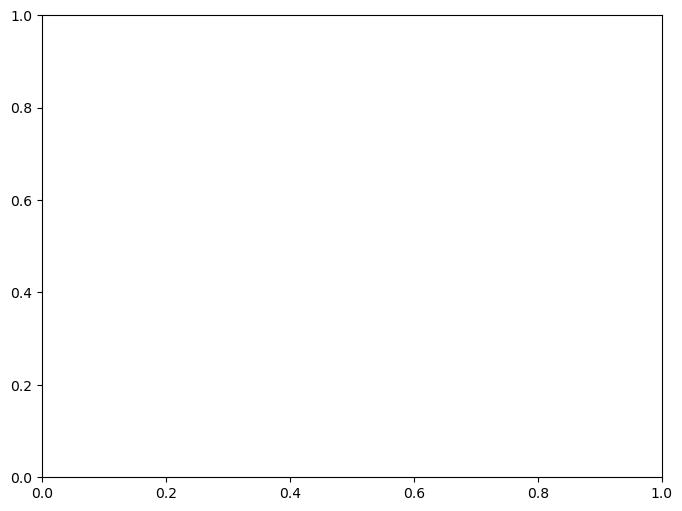

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=x_pro,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()

So , Here we are selecting Linear Regression Model for our Production.

- R2_Score: 94.45739299538967
- mean_squared_error: 7.813944732213918
- mean_absolute_error: 1.9820069209563371
- RMSE value: 2.7953434014828873

In [131]:
import pickle
filename=('BaseBall.pkl')
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [134]:
loaded_model=pickle.load(open('BaseBall.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

-13.466270990156337


In [133]:
conclusion=pd.DataFrame([loaded_model.predict(x_train)[:],pred_decision[:]],index=['predicted','original'])

In [103]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
predicted,79.5,79.5,79.5,79.5,79.5,79.5,79.5,79.5,79.5,79.5,...,79.5,79.5,79.5,79.5,79.5,79.5,79.5,79.5,79.5,79.5
original,79.5,79.5,79.5,79.5,79.5,79.5,79.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
